# Semana 7: RNN
12/11/2024
- Andre Galindo A00833376
- Rafhale Chavéz A00832228
- Daniel Sánchez A01197699
- José David De la Garza A00834760
- Pablo Andrés Martínez A01252489

# Introducción
En este notebook, se analiza la frecuencia de ventas de vehículos Tesla a lo largo del tiempo con el objetivo de crear un modelo RNN capaz de predecir las ventas en los meses siguientes, partiendo de un punto de inicio personalizado. A lo largo del proceso, se ajusta el modelo para reducir el error y mejorar su precisión, con el fin de que las predicciones se ajusten lo mejor posible a los datos de ventas reales. Al final, se analizarán los resultados visualmente, observando cómo las predicciones se comparan con las ventas históricas esto por medio de una gráfica.
# Objetivo
- Ver el comportamiento de las RNN
- Ajustar los hiperparametros y ver que gráfica se puede ajustar adecuadamente al modelo
- Crear un modelo eficiente de RNN

In [ ]:
pip install TensorFlow

In [ ]:
# Importación de librerías para la limpieza de datos y para crear el modelo
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Cargar el conjunto de datos
data = pd.read_csv("TSLA.csv")

# Filtrar para usar solo la columna de fecha y el precio de cierre ajustado
data = data[['Date', 'Close']]
# Convertir los datos a fechas
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
# Ver los primeros datos del dataframe
print(data.head())

                Close
Date                 
2010-06-29  23.889999
2010-06-30  23.830000
2010-07-01  21.959999
2010-07-02  19.200001
2010-07-06  16.110001


In [ ]:
# Se normalizan los datos de la parte de las ventas
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

# Crear secuencias de datos: Se uso los últimos 60 días para predecir el siguiente día
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(data)):
# Asignación de los features y labels
    X.append(data['Close'].values[i-sequence_length:i])
    y.append(data['Close'].values[i])

# Se vuelven arrays los features y labels
X, y = np.array(X), np.array(y)

# Redimensionar X para que tenga la forma
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [ ]:
# Creación del modelo de RNN
model = Sequential()
# Agregar capas de entrada y de salida
model.add(SimpleRNN(50, activation='relu', input_shape=(X.shape[1], 1)))
# Salida de una neurona, que es el precio de cierre predicho
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Entrenamiento del modelo de RNN
model.fit(X, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0289
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.6499e-04
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2889e-04
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.8929e-04
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.6886e-04
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.2697e-04
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.8178e-04
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1125e-04
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.4604e-04
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9978e-04
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.4292e-04
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.7947e-04
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 4.1904e-04
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.4175e-04
Epoch 15/50
51/51 ━━━━

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


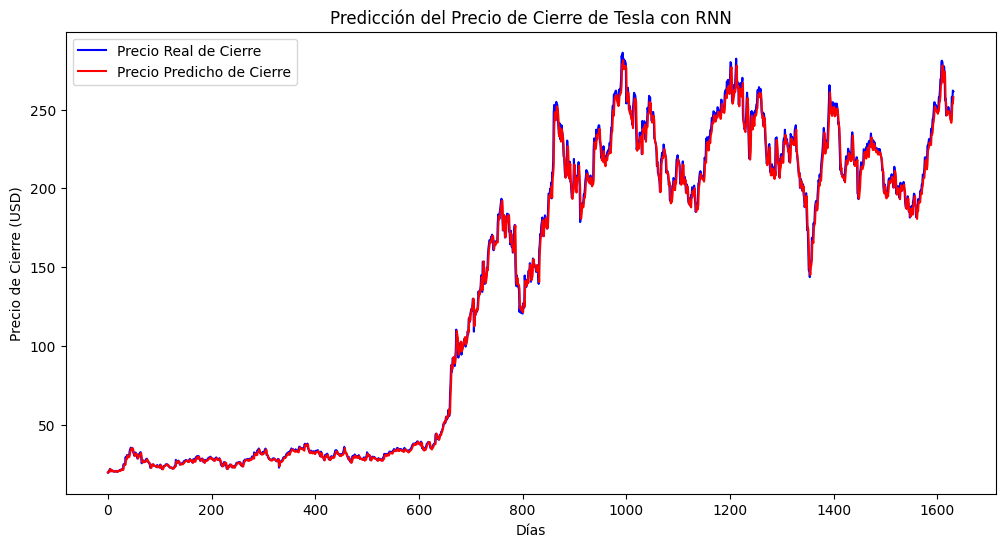

In [ ]:
# Realizar predicciones en el conjunto de datos
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Graficar los precios reales vs predichos
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Precio Real de Cierre')
plt.plot(predicted_prices, color='red', label='Precio Predicho de Cierre')
plt.title('Predicción del Precio de Cierre de Tesla con RNN')
plt.xlabel('Días')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Conclusión
El modelo de RNN ha demostrado un rendimiento satisfactorio en la predicción del precio de cierre de las acciones de Tesla, con un error bastante bajo de 3.0058e-04. Este valor indica que el modelo logró una buena aproximación a los precios reales, lo que sugiere que la RNN es efectiva para capturar patrones y tendencias en series temporales de datos financieros.

El error bajo también sugiere que el modelo está bien ajustado para los datos utilizados y que la RNN fue capaz de aprender las dependencias temporales que influyen en el comportamiento del precio de las acciones de Tesla. Sin embargo es importante mencionar que en otro tipo de casos los precios pueden verse afectados por factores no tn predecibles que pueden llegar a afectar al modelo en sus resultado.
